In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [2]:
df=pd.read_csv("MagicBricks.csv")

In [3]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


## Data info

In [4]:
df.shape

(1259, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [6]:
int_feat=df.select_dtypes(include=["int64"]).columns
print("Total integer features : ",int_feat.shape[0])
print("Integer features names : ",int_feat.tolist())

Total integer features :  2
Integer features names :  ['BHK', 'Price']


In [7]:
float_feat=df.select_dtypes(include=["float64"]).columns
print("Total float features : ",float_feat.shape[0])
print("Float features names : ",float_feat.tolist())

Total float features :  4
Float features names :  ['Area', 'Bathroom', 'Parking', 'Per_Sqft']


In [8]:
obj_feat=df.select_dtypes(include=["object"]).columns
print("Total categorical features : ",obj_feat.shape[0])
print("categorical features names : ",obj_feat.tolist())

Total categorical features :  5
categorical features names :  ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']


In [9]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


## Data Cleansing

### 1. Missing Values Handling

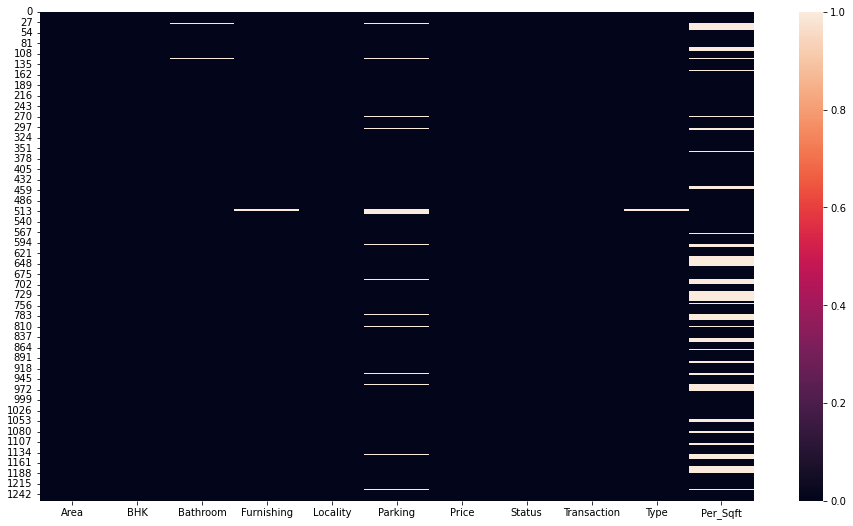

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_of_null_values.png")

In [11]:
null_count=df.isnull().sum()
null_count

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [12]:
null_percent=null_count/df.shape[0] * 100
null_percent

Area            0.000000
BHK             0.000000
Bathroom        0.158856
Furnishing      0.397141
Locality        0.000000
Parking         2.621128
Price           0.000000
Status          0.000000
Transaction     0.000000
Type            0.397141
Per_Sqft       19.142176
dtype: float64

In [13]:
missing_val_feat=null_percent[null_percent>0]
print("Total no. of missing value features : ",len(missing_val_feat))
missing_val_feat

Total no. of missing value features :  5


Bathroom       0.158856
Furnishing     0.397141
Parking        2.621128
Type           0.397141
Per_Sqft      19.142176
dtype: float64

In [14]:
cat_na_feat=missing_val_feat[missing_val_feat.keys().isin(obj_feat)]
cat_na_feat

Furnishing    0.397141
Type          0.397141
dtype: float64

In [15]:
float_na_feat=missing_val_feat[missing_val_feat.keys().isin(float_feat)]
float_na_feat

Bathroom     0.158856
Parking      2.621128
Per_Sqft    19.142176
dtype: float64

#### Handling "Furnishing"

In [16]:
df["Furnishing"].value_counts()

Semi-Furnished    708
Unfurnished       363
Furnished         183
Name: Furnishing, dtype: int64

C:\Users\Aryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Furnishing', ylabel='count'>

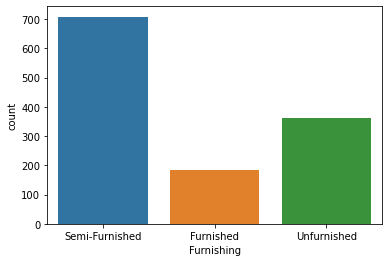

In [17]:
sns.countplot(df["Furnishing"])

In [18]:
df_old=df.copy()        #backup

In [19]:
furnishing_mode=df["Furnishing"].mode()[0]
df["Furnishing"].replace(np.nan,furnishing_mode,inplace=True)
df["Furnishing"].isnull().sum()

0

#### Handling "Type"

In [20]:
df["Type"].value_counts()

Builder_Floor    661
Apartment        593
Name: Type, dtype: int64

C:\Users\Aryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

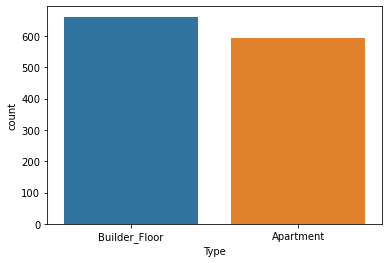

In [21]:
sns.countplot(df["Type"])

In [22]:
type_mode=df["Type"].mode()[0]
df["Type"].replace(np.nan,type_mode,inplace=True)
df["Type"].isnull().sum()

0

#### Handling "Bathroom"

In [23]:
def boxHistPlot(df,figsize=(16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(df)
    plt.subplot(122)
    sns.distplot(df)

C:\Users\Aryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aryan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


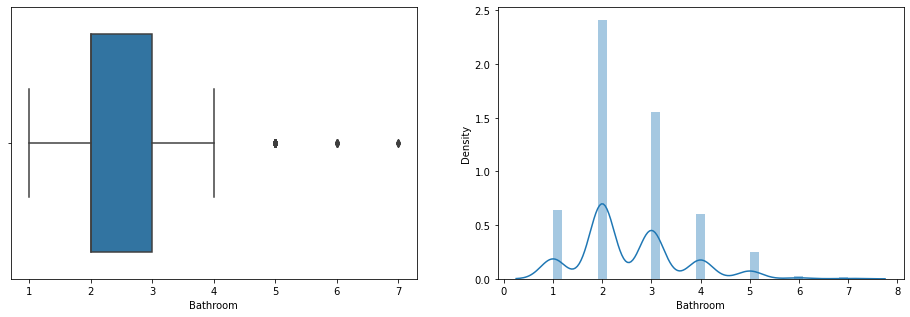

In [24]:
boxHistPlot(df["Bathroom"])

In [25]:
Bathroom_median=df["Bathroom"].median()
Bathroom_median

2.0

In [26]:
df["Bathroom"].replace(np.nan,Bathroom_median,inplace=True)
df["Bathroom"].isnull().sum()

0

#### Handling "Parking"

C:\Users\Aryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aryan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


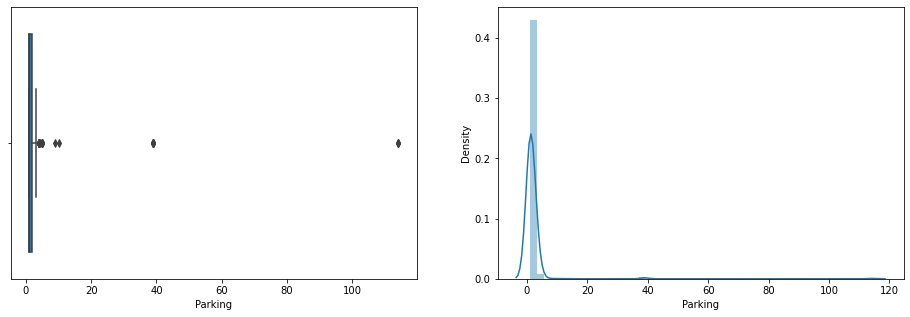

In [27]:
boxHistPlot(df["Parking"])

In [28]:
df["Parking"].value_counts()

1.0      796
2.0      341
3.0       54
4.0       16
5.0        7
39.0       7
114.0      3
9.0        1
10.0       1
Name: Parking, dtype: int64

In [29]:
Parking_median=df["Parking"].median()
Parking_median

1.0

In [30]:
df["Parking"].replace(np.nan,Parking_median,inplace=True)
df["Parking"].isnull().sum()

0

#### Handling "Per_Sqft"

C:\Users\Aryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aryan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


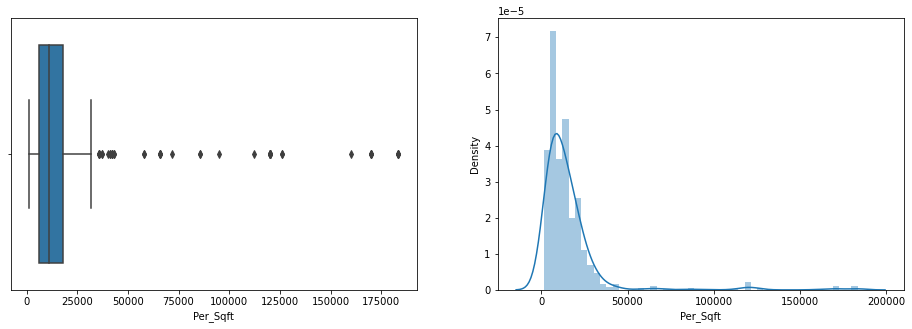

In [31]:
boxHistPlot(df["Per_Sqft"])

In [32]:
persqft_median=df["Per_Sqft"].median()
persqft_median

11291.5

In [33]:
df["Per_Sqft"].replace(np.nan,persqft_median,inplace=True)
df["Per_Sqft"].isnull().sum()

0

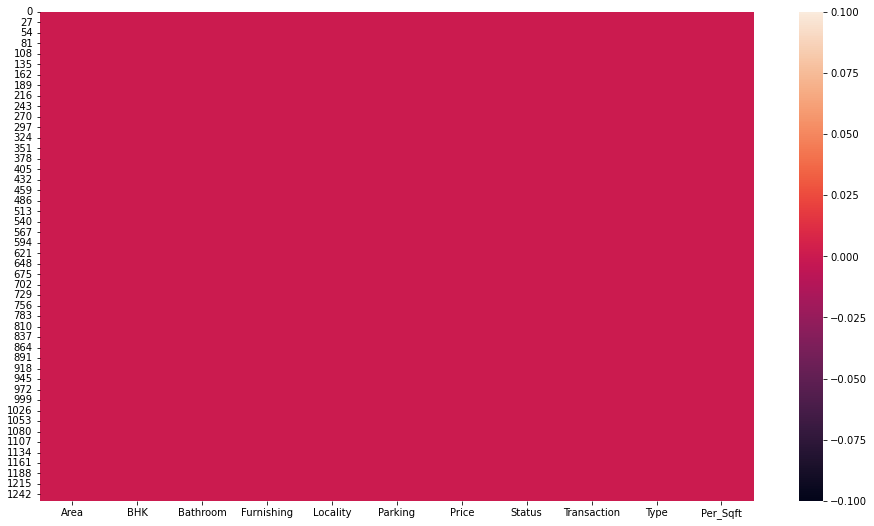

In [34]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_of_null_values_after_imputation.png")

In [35]:
df_old=df.copy()   #backup

### 2. Outlier Detection and Removal

In [36]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    LB=Q1-(1.5*IQR)
    UB=Q3+(1.5*IQR)
    
    ls=df.index[ (df[ft]<LB) | (df[ft]>UB) ]
    
    return ls

In [37]:
index_list = []
for feature in ['BHK','Bathroom','Parking',"Per_Sqft"]:
    index_list.extend(outliers(df,feature))

In [38]:
index_list

[163,
 164,
 196,
 209,
 224,
 225,
 242,
 253,
 261,
 272,
 345,
 347,
 352,
 353,
 419,
 479,
 494,
 495,
 510,
 519,
 527,
 585,
 659,
 660,
 676,
 679,
 680,
 681,
 683,
 684,
 721,
 1029,
 1124,
 1126,
 1202,
 57,
 103,
 109,
 224,
 225,
 242,
 248,
 252,
 253,
 255,
 257,
 265,
 272,
 279,
 285,
 297,
 298,
 353,
 424,
 494,
 495,
 527,
 543,
 546,
 567,
 585,
 589,
 593,
 596,
 659,
 660,
 663,
 665,
 669,
 675,
 676,
 680,
 681,
 683,
 684,
 902,
 903,
 908,
 922,
 923,
 1008,
 1017,
 1029,
 1050,
 1052,
 1054,
 1064,
 1070,
 1072,
 1074,
 1124,
 1126,
 1202,
 1209,
 1210,
 1211,
 1219,
 1221,
 1223,
 1232,
 1245,
 1254,
 21,
 39,
 122,
 123,
 225,
 242,
 255,
 298,
 328,
 477,
 495,
 543,
 571,
 788,
 789,
 790,
 806,
 822,
 823,
 875,
 876,
 877,
 878,
 879,
 880,
 881,
 902,
 941,
 969,
 970,
 971,
 1114,
 1241,
 1242,
 1243,
 104,
 105,
 106,
 107,
 152,
 153,
 157,
 209,
 232,
 233,
 234,
 235,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 281,
 327,
 328,
 334,
 350,
 

In [39]:
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [40]:
df_cleaned=remove(df,index_list)
df_cleaned.shape

(1078, 11)

In [41]:
df.shape

(1259, 11)

In [42]:
df=df_cleaned.copy()

In [43]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1078.000000,1078.000000,1078.000000,1078.000000,1.078000e+03,1078.000000
mean,1274.926203,2.661410,2.384045,1.315399,1.702017e+07,11071.737013
std,987.670145,0.809309,0.824984,0.519592,1.656247e+07,5494.754913
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1667.000000
25%,800.000000,2.000000,2.000000,1.000000,5.500000e+06,6667.000000
50%,1132.500000,3.000000,2.000000,1.000000,1.310000e+07,11291.500000
75%,1571.250000,3.000000,3.000000,2.000000,2.250000e+07,14366.000000
max,17010.000000,4.000000,4.000000,3.000000,1.200000e+08,28283.000000


## Converting Categorical Features to Numercial Features

In [44]:
def convert(df,ft):
    df[ft] = df[ft].astype(CategoricalDtype(categories=df[ft].unique(),ordered=True)).cat.codes

In [45]:
for feature in ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']:
    convert(df,feature)


In [46]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,0,0,1.0,6500000,0,0,0,11291.5
1,750.0,2,2.0,0,1,1.0,5000000,0,0,1,6667.0
2,950.0,2,2.0,1,2,1.0,15500000,0,1,1,6667.0
3,600.0,2,2.0,0,3,1.0,4200000,0,1,0,6667.0
4,650.0,2,2.0,0,4,1.0,6200000,0,0,0,6667.0


In [47]:
df["Furnishing"].value_counts()

0    613
2    310
1    155
Name: Furnishing, dtype: int64

In [48]:
df["Status"].value_counts()

0    1024
1      54
Name: Status, dtype: int64

In [49]:
df["Transaction"].value_counts()

1    690
0    388
Name: Transaction, dtype: int64

In [50]:
df["Type"].value_counts()

0    551
1    527
Name: Type, dtype: int64

In [51]:
df["Locality"].value_counts()

1      30
19     30
24     29
81     24
238    23
       ..
157     1
158     1
159     1
160     1
341     1
Name: Locality, Length: 342, dtype: int64

In [52]:
df=df.drop('Locality',axis=1)             #because it has 342 different localities, hence is not useful for prediction

In [53]:
df.shape

(1078, 10)

In [54]:
df

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,0,1.0,6500000,0,0,0,11291.5
1,750.0,2,2.0,0,1.0,5000000,0,0,1,6667.0
2,950.0,2,2.0,1,1.0,15500000,0,1,1,6667.0
3,600.0,2,2.0,0,1.0,4200000,0,1,0,6667.0
4,650.0,2,2.0,0,1.0,6200000,0,0,0,6667.0
...,...,...,...,...,...,...,...,...,...,...
1253,1200.0,3,3.0,0,1.0,16500000,0,1,0,12916.0
1255,1050.0,3,2.0,0,3.0,12500000,0,1,0,12916.0
1256,875.0,3,3.0,0,3.0,17500000,0,0,0,12916.0
1257,990.0,2,2.0,2,1.0,11500000,0,1,0,12916.0


## Splitting Data for Training and Testing

In [55]:
len_train = 870        #approx 80% of the data
x_train = df[:len_train].drop("Price",axis=1)
y_train = df["Price"][:len_train]

x_test = df[len_train:].drop("Price",axis=1)
y_test = df["Price"][len_train:]

print("Shape of x_train : ",x_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of x_test : ",x_test.shape)
print("Shape of y_test : ",y_test.shape)

Shape of x_train :  (870, 9)
Shape of y_train :  (870,)
Shape of x_test :  (208, 9)
Shape of y_test :  (208,)


## Feature Scaling

In [56]:
sc = StandardScaler()
sc.fit(x_train)
#formula z = (x-u)/s

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [57]:
x_train[:3,:]

array([[-0.50023443,  0.43447002, -0.39463328, -0.82583267, -0.55670358,
        -0.21075523, -1.29178623, -0.96831772,  0.09568428],
       [-0.5591369 , -0.75417437, -0.39463328, -0.82583267, -0.55670358,
        -0.21075523, -1.29178623,  1.03271889, -0.7001341 ],
       [-0.32352704, -0.75417437, -0.39463328,  0.31823488, -0.55670358,
        -0.21075523,  0.77412189,  1.03271889, -0.7001341 ]])

In [58]:
x_test[:3,:]

array([[-0.14681964,  0.43447002,  0.81427853, -0.82583267,  1.41212616,
        -0.21075523,  0.77412189,  1.03271889, -1.36938217],
       [-0.79474676, -0.75417437, -1.60354509, -0.82583267,  1.41212616,
        -0.21075523,  0.77412189,  1.03271889, -1.36938217],
       [-0.5591369 ,  0.43447002, -0.39463328, -0.82583267, -0.55670358,
        -0.21075523,  0.77412189, -0.96831772, -1.36938217]])

## Train ML Model

In [59]:
!pip install xgboost

In [60]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [61]:
svr = SVR() 
lr = LinearRegression()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()

In [62]:
models  = {"a": ["LinearRegression",lr],
           "b": ["SVR",svr],
           "c": ["SGDRegressor",sgdr],
           "d": ["KNeighborsRegressor",knr],
           "e": ["GradientBoostingRegressor",gbr],
           "f": ["RandomForestRegressor",rfr],
           "g": ["XGBRegressor",xgbr]
          }

In [63]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model,x_train=x_train, y_train=y_train):
    cv=KFold(n_splits = 7, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score=cross_val_score(model,x_train,y_train,cv=cv,scoring=r2)
    score=[r2_val_score.mean()]
    return score

In [64]:
models_score = []
for model in models:
    print("Training model : ",models[model][0])
    score = test_model(models[model][1], x_train, y_train)
    print("Score of model : ",score)
    models_score.append([models[model][0],score[0]])

Training model :  LinearRegression
Score of model :  [0.6409004625182593]
Training model :  SVR
Score of model :  [-0.09109730532380482]
Training model :  SGDRegressor
Score of model :  [0.6402478683410616]
Training model :  KNeighborsRegressor
Score of model :  [0.7285333056742099]
Training model :  GradientBoostingRegressor
Score of model :  [0.8088179671282992]
Training model :  RandomForestRegressor
Score of model :  [0.8134185401243982]
Training model :  XGBRegressor
Score of model :  [0.7961161178807211]


In [65]:
models_score

[['LinearRegression', 0.6409004625182593],
 ['SVR', -0.09109730532380482],
 ['SGDRegressor', 0.6402478683410616],
 ['KNeighborsRegressor', 0.7285333056742099],
 ['GradientBoostingRegressor', 0.8088179671282992],
 ['RandomForestRegressor', 0.8134185401243982],
 ['XGBRegressor', 0.7961161178807211]]

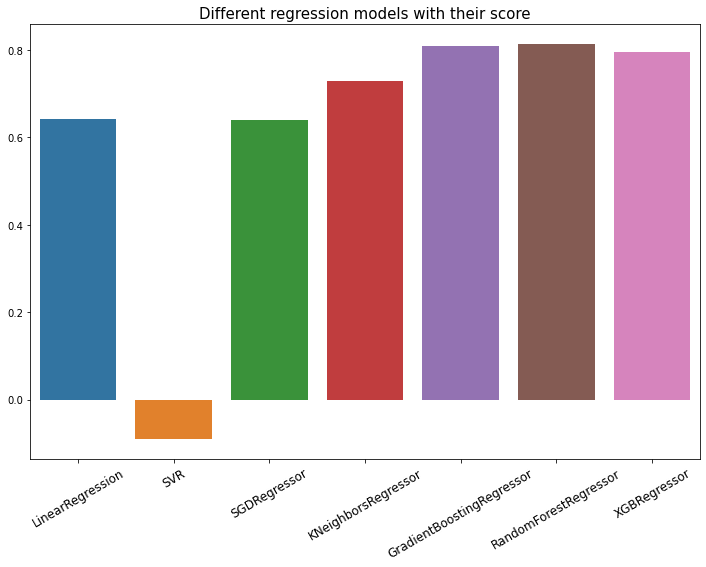

In [66]:
plt.figure(figsize=(12,8))
sns.barplot(x=list(list(zip(*models_score))[0]), y=list(list(zip(*models_score))[1]))
plt.title("Different regression models with their score", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

## Making Prediction 

In [67]:
# Since RandomForestRegressor and GradientBoostRegressor gave the maximum score, we will use them for prediction

In [68]:
from sklearn.metrics import mean_absolute_percentage_error

In [69]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [70]:
y_pred_rf=rf.predict(x_test)
print("Mean absolute percentage error : ",mean_absolute_percentage_error(y_test,y_pred_rf))

Mean absolute percentage error :  0.303177364675203


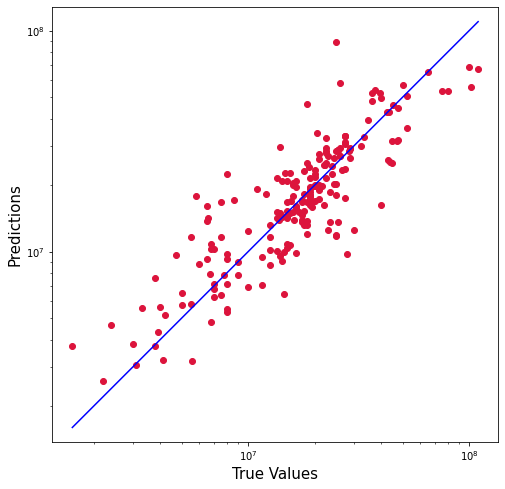

In [71]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_rf, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_rf), max(y_test))
p2 = min(min(y_pred_rf), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

C:\Users\Aryan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Aryan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


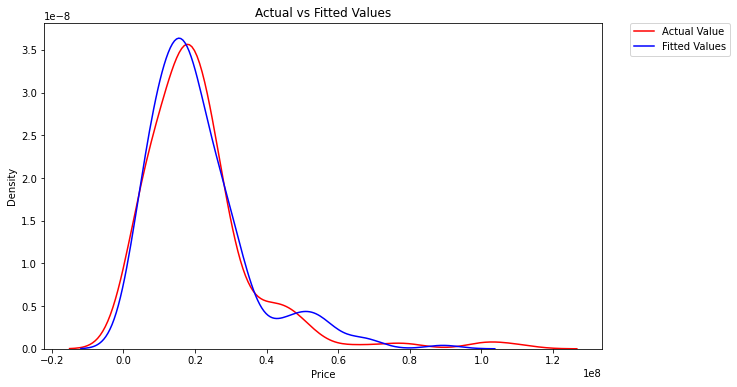

In [72]:
width = 10
height = 6
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_rf, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.close()

In [73]:
gb = GradientBoostingRegressor(random_state=0)
gb.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [74]:
y_pred_gb=gb.predict(x_test)
print("Mean absolute percentage error : ",mean_absolute_percentage_error(y_test,y_pred_gb))

Mean absolute percentage error :  0.3051425884372338


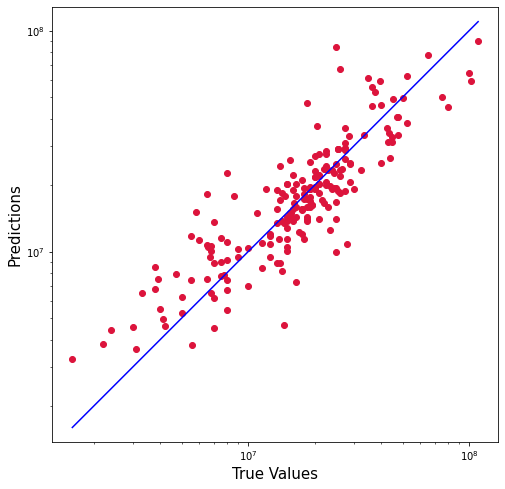

In [75]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_gb, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_gb), max(y_test))
p2 = min(min(y_pred_gb), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

C:\Users\Aryan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Aryan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


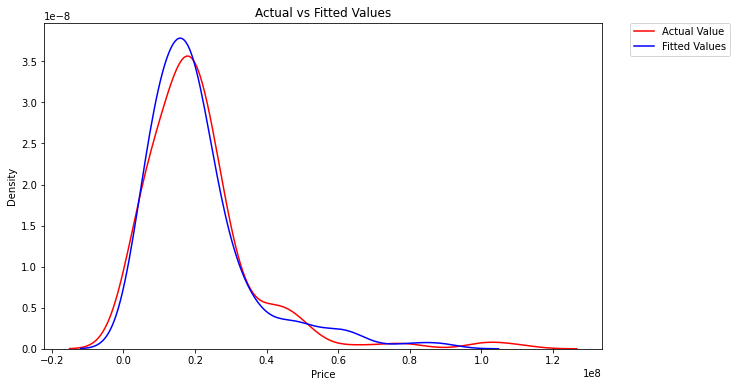

In [76]:
width = 10
height = 6
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_gb, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.close()